## Load packages

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as morph
from skimage import filters
from scipy import ndimage
%matplotlib inline

# Exercise 1: The Histogram

Open the image "comp_noise.png" and show it

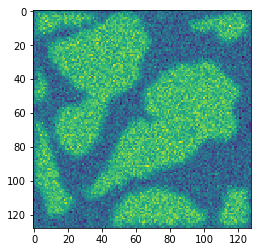

In [6]:
img=plt.imread('comp_noise.png')

plt.imshow(img)

The histogram is created by [https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram.html](numpy.histogram)

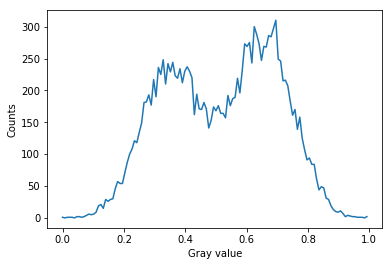

In [14]:
hist,axis = np.histogram(img,bins=128)
plt.plot(axis[0:-1],hist)
plt.xlabel('Gray value')
plt.ylabel('Counts')

You apply a threshold by bimg=>th where th is the threshold.

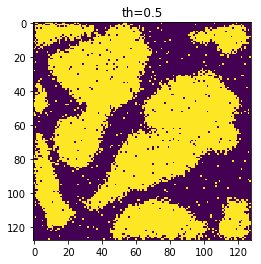

In [16]:
bimg=0.5<img
plt.imshow(bimg)
plt.title('th=0.5')

Now, create two subplots with images where the thresholds are placed on
the first and second histogram peaks. Add the previous image segmented between the peaks.

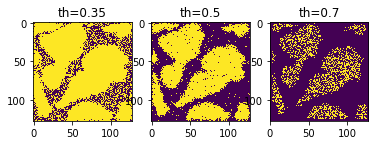

In [19]:
bimg_lo=0.35<img
plt.subplot(1,3,1)
plt.imshow(bimg_lo)
plt.title('th=0.35')

bimg_mid=0.50<img
plt.subplot(1,3,2)
plt.imshow(bimg_mid)
plt.title('th=0.5')

bimg_hi=0.70<img
plt.subplot(1,3,3)
plt.imshow(bimg_hi)
plt.title('th=0.7')

# Exercise 2: Explore thresholding methods
Use the same image as in the previous exercise. SciKit Image provides many thresholding methods http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html.

One is the Otsu threshold. To segment an image you perform the following steps.

The threshold according to 0.509765625


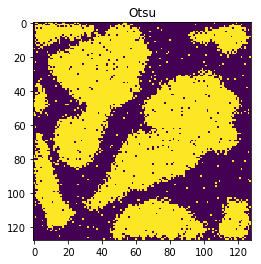

In [29]:
otsu = filters.threshold_otsu(img)
print('The threshold according to',otsu)
plt.imshow(otsu<img)
plt.title('Otsu')

# Exercise 3: Threshold based on likelihood ratio

Use the image noisy_2var.mat. Segment it using the
following hypotheses:
\begin{eqnarray}
H_0 &:& \mathcal{N}(0,1), P_0=0.6\nonumber\\
H_1 &:& \mathcal{N}(0,1.5), P_1=0.4\nonumber
\end{eqnarray}

Compute the log-likelihood ratio from
$\Lambda(R)=\frac{p_{r|H_1}(R|H_1)}{p_{r|H_0}(R|H_0)}=\gamma$
with
\begin{eqnarray}
p_{r|H_0}(R|H_0)&=& \prod_{i=1}^{N}\frac{1}{\sqrt{2\,\pi}\sigma_0}\exp{\frac{{R_i}^2}{2\,{\sigma_0}^2}}\nonumber\\
p_{r|H_1}(R|H_1)&=&\prod_{i=1}^{N}\frac{1}{\sqrt{2\,\pi}\sigma_1}\exp{\frac{{R_i}^2}{2\,{\sigma_1}^2}}
\nonumber
\end{eqnarray}

The evaluation of the likelihood ratio is found in van Trees p. 29 (included PDF). From this evaluation it is given that
1. The local sum of squares ($l(R)=\sum_{i=1}^{N} R_i^2 $) is our sufficient statistic
2. The threshold is $l(R) \lessgtr \frac{2\sigma_0^2 \sigma_1^2}{\sigma_1^2 - \sigma_0^2} \left(N \ln\frac{\sigma_0}{\sigma_1}-\ln \eta\right)=\gamma$


$h_{N\times N}$ is box filter with all weights =1 and $f_{median}$ is median filtered with $N\times N$.

1. Test the thresholding with different values on $\eta$. 
2. Compare with an Otsu threshold.

First, we need some data

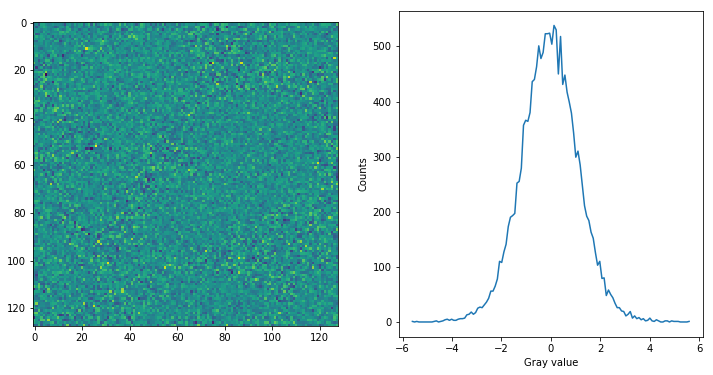

In [83]:
s0=1.0
s1=2.0
simg=img*(np.random.normal(0,s0,img.shape))+(1-img)*(np.random.normal(0,s1,img.shape))
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.imshow(simg)
plt.subplot(1,2,2)
hist,axis = np.histogram(simg,bins=128)
plt.plot(axis[0:-1],hist)
plt.xlabel('Gray value')
plt.ylabel('Counts')

Verify if it makes sense to use the sufficient statistic. Filter the imgage squared with a uniform filter (kernel size NxN)

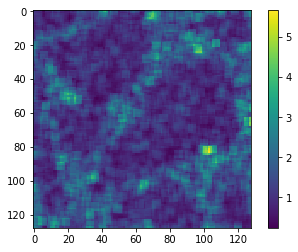

In [66]:
plt.imshow(ndimage.uniform_filter(simg**2,5))
plt.colorbar()

Now define a function for the likelihood ratio...

In [79]:
def LikelihoodRatio(img,s0,s1,N,eta) :
    img2 = ndimage.uniform_filter(img**2,N)*N**2
    gamma = ((2 * s0**2 * s1**2)/(s1**2-s0**2)*(np.log(eta)-N*N*np.log(s0/s1)))
    res= img2 < gamma
    return res

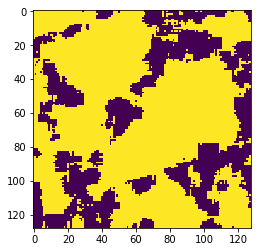

In [78]:
plt.imshow(LikelihoodRatio(simg,s0,s1,7,0.005))